Statistiques descriptives

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("../DS_DEVDUR_data.csv")

In [2]:
## création d'une fonction permettant d'explorer le jeu de données de manière descriptive d'un coup.
def overview(df):
    colonnes = df.columns ## noms des colonnes
    forme = df.shape ## dimensions
    valeurs_nulles = df.isnull().sum() ## valeurs nulles à remplacer
    descr = df.describe(include = 'all') ## 
    print(f"Ce jeu de données contient {forme[1]} colonnes et {forme[0]} lignes.\n")
    
    for col in df.columns:
        uniques = df[col].nunique()
        print(f"{col}: {uniques} valeurs uniques. \n")
        if uniques < 10:
            print(data[col].value_counts(), "\n")
    print(f" Pour une vision plus poussée: {descr}.\n")
    return df.head(5)


In [3]:
overview(data)

Ce jeu de données contient 15 colonnes et 9076 lignes.

ODD: 17 valeurs uniques. 

INDICATEUR_DEVDUR: 175 valeurs uniques. 

UNIT_MEASURE: 20 valeurs uniques. 

UNIT_MULT: 3 valeurs uniques. 

UNIT_MULT
0    7226
6    1490
3     360
Name: count, dtype: int64 

OBS_STATUS: 6 valeurs uniques. 

OBS_STATUS
A    5664
L    2239
R     504
E     304
B     254
P     111
Name: count, dtype: int64 

GEO: 5 valeurs uniques. 

GEO
F            4698
FM           3361
F_X_D976      889
DOM_COMER     115
DOM            13
Name: count, dtype: int64 

GEO_OBJECT: 2 valeurs uniques. 

GEO_OBJECT
FRANCE    8948
OTHER      128
Name: count, dtype: int64 

DEVDUR_COMPOSITE: 192 valeurs uniques. 

SEX: 7 valeurs uniques. 

SEX
_Z       4481
_T       3134
F         797
M         619
M_cis      15
F_cis      15
TS         15
Name: count, dtype: int64 

AGE: 40 valeurs uniques. 

EMPSTA: 11 valeurs uniques. 

PCS: 8 valeurs uniques. 

PCS
_Z     7891
_T      775
4        85
6        85
5        85
1_2      70
3

,ODD,INDICATEUR_DEVDUR,UNIT_MEASURE,UNIT_MULT,OBS_STATUS,GEO,GEO_OBJECT,DEVDUR_COMPOSITE,SEX,AGE,EMPSTA,PCS,TYPE_INDICATEUR_DEVDUR,TIME_PERIOD,OBS_VALUE
0,ODD1,1.i1a,PT,0,A,FM,FRANCE,NIVIEMED_S60,_T,_T,11,_T,I_ODD,2015,6.5
1,ODD3,3.i2,_Z,0,E,F,FRANCE,CONTAMIN_MOD4,_T,_T,_Z,_Z,I_ODD,2021,255.0
2,ODD2,2.i2f,PT,0,L,F,FRANCE,_Z,_T,_Z,_Z,1_2,I_ODD,2015,NaN
3,ODD1,1.i1a,PT,0,A,FM,FRANCE,NIVIEMED_S60,_T,Y40T49,_T,_T,I_ODD,2016,13.5
4,ODD11,11.i1,PT,0,L,FM,FRANCE,_Z,_T,_T,_Z,_Z,I_ODD,2015,NaN


In [27]:
pd.crosstab(data['TIME_PERIOD'],data['OBS_STATUS'])
correspondances_status = pd.read_csv("https://user-margotpradels-475789-0.user.lab.sspcloud.fr/lab/tree/TDB/DATA/OBS_STATUS_correspondance.csv", sep = ",")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 15, saw 2


Exploration visuelle

In [ ]:
# Histogramme d'une variable
#faire un rank des odd avant de produire le graphique

plt.hist(data[data['ODD'] == 'ODD17'][data['TIME_PERIOD']==2020]['INDICATEUR_DEVDUR'])
plt.show()

IMPRIMER CE GRAPHIQUE PAR AN ET PAR ODD <BR>
**2 boucles for imbriquées**: 1 sur l'année + 1 sur ODD 

Imprimer ensuite les indicateurs / ODD les plus représentés sur l'année sans disctinction par ODD (N premiers). <br>

Imprimer aussi sur la page bilan les indicateurs suivants: <br>
        - les plus représentés depuis début <br>
        - ceux ayant le plus croit depuis début <br>
        - les moins représentés <br>

<i>A définir</i>: est ce plus intéressant de compter les occurrences par ODD ou de comparer les OBS_VALUE? 

<Axes: xlabel='GEO', ylabel='Count'>

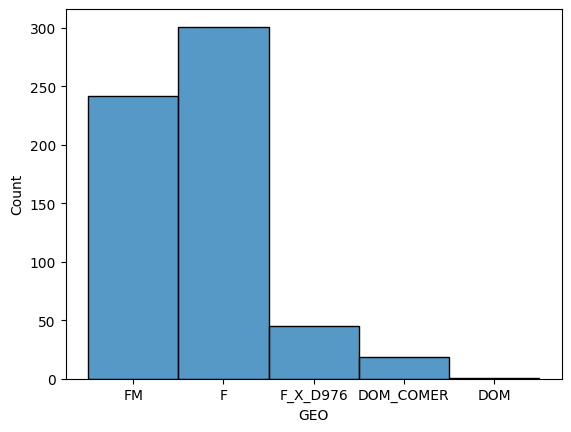

In [43]:
# Histogramme de GEO: 
sns.histplot(data[data['TIME_PERIOD'] == 2020]['GEO'])

In [44]:
## Différence entre GEO_OBJECT et GEO
geo_for_other = data[data['GEO_OBJECT']=='OTHER']
print(geo_for_other['GEO'].unique())

['DOM_COMER' 'DOM']


In [46]:
## Carte de répartition des actions menées

IMPRIMER CE GRAPHIQUE PAR AN <BR>
**1 boucle for** sur l'année ('TIME_PERIOD')
Mettre en page sur une carte plutôt qu'un histogramme. 

In [ ]:
## Répartition sur le sexe
data_sexe = data['SEX'].astype(float)
plt.pie(data_sexe)